# Topic: Custumer Clustering with RFM & Clustering Algorithm
## Demo: E-commerce Project
### Tham khảo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

In [2]:
df = pd.read_csv('Data/e-commerce.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [4]:
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [5]:
string_to_date = lambda x : datetime.strptime(x, "%d/%m/%Y").date()

# Convert InvoiceDate from object to datetime format
df['day'] = df['day'].apply(string_to_date)
df['day'] = df['day'].astype('datetime64[ns]')

# Drop NA values
df = df.dropna()

In [6]:
# Print DataFrame
df.head(3)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-12-04,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-04-01,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-11-05,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2


In [7]:
df.tail(3)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
70049,QID,Product H,33 / C / FtO,84-EB3-E68-8BF-1-F2EE65C,29857030,1201357,26287500138156,2018-11-19,-3,0.0,0.0,-222.50,-222.50,-44.5,-267.0,-3,0
70050,KNB,Product P,40 / B / FtO,DB-5D5-1F5-964-6-F33469E,81507405,9368488,59112081344038,2019-04-08,-3,0.0,0.0,-237.49,-237.49,-47.5,-285.0,-3,0
70051,WHX,Product P,38 / C / FtO,1C-F31-5C5-A71-9-E27F89C,23625707,7861225,34850379713899,2019-01-02,-3,0.0,0.0,-237.50,-237.50,-47.5,-285.0,-3,0


In [8]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['day'].min(), df['day'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df.customer_id.isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(df.customer_id.unique())))

Transactions timeframe from 2018-11-01 00:00:00 to 2019-04-30 00:00:00
0 transactions don't have a customer id
25,543 unique customer_id


## RFM

### Create RFM analysis for each customers

In [9]:
# RFM
# Convert string to date, get max date of dataframe
max_date = df['day'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('customer_id').agg({'day': Recency,
                                        'order_id': Frequency,
                                        'gross_sales': Monetary })

In [10]:
df_RFM.head()

,day,order_id,gross_sales
customer_id,,,
1000661,141,1,237.53
1001914,158,1,82.50
1002167,53,4,211.67
1002387,44,1,74.17
1002419,95,1,106.67


In [11]:
# Rename the columns of DataFrame
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [12]:
df_RFM.head()

,Recency,Frequency,Monetary
customer_id,,,
8325158,4,17,2812.58
2028611,98,17,2661.72
6578818,5,16,2486.73
7843272,0,20,2325.06
8032770,50,13,2065.88


In [13]:
df_RFM.shape

(25543, 3)

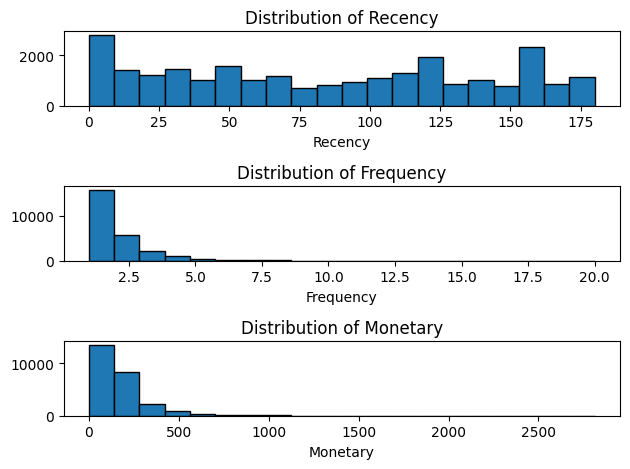

In [14]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [15]:
# Frequency, Monetary: right skew
# Nhận xét các biều đồ

### Calculate RFM quartiles

In [16]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [17]:
[*r_labels]

[4, 3, 2, 1]

In [18]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [19]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
8325158,4,17,2812.58,4,4,4
2028611,98,17,2661.72,2,4,4
6578818,5,16,2486.73,4,4,4
7843272,0,20,2325.06,4,4,4
8032770,50,13,2065.88,3,4,4


### Concat RFM quartile values to create RFM Segments

In [20]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [21]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
customer_id,,,,,,,
8325158,4,17,2812.58,4,4,4,444
2028611,98,17,2661.72,2,4,4,244
6578818,5,16,2486.73,4,4,4,444
7843272,0,20,2325.06,4,4,4,444
8032770,50,13,2065.88,3,4,4,344


#### Count num of unique segments

In [22]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [23]:
print(rfm_count_unique.sum())

48


- Having 48 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

#### Calculate RFM score and level

In [24]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
8325158,4,17,2812.58,4,4,4,444,12
2028611,98,17,2661.72,2,4,4,244,10
6578818,5,16,2486.73,4,4,4,444,12
7843272,0,20,2325.06,4,4,4,444,12
8032770,50,13,2065.88,3,4,4,344,11


### Manual Segmentation

In [25]:
def rfm_level(df):
    # Check for special 'STARS' and 'NEW' conditions first
    if df['RFM_Score'] == 12:
        return 'STARS'
    elif df['R'] == 4 and df['F'] == 1 and df['M'] == 1:
        return 'NEW'
    # Then check for other conditions
    elif df['M'] == 4:
        return 'BIG SPENDER'
    elif df['F'] == 4:
        return 'LOYAL'
    elif df['R'] == 4:
        return 'ACTIVE'
    elif df['R'] == 1:
        return 'LOST'
    elif df['M'] == 1:
        return 'LIGHT'
    else:
        return 'REGULARS'

In [26]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [27]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
8325158,4,17,2812.58,4,4,4,444,12,STARS
2028611,98,17,2661.72,2,4,4,244,10,BIG SPENDER
6578818,5,16,2486.73,4,4,4,444,12,STARS
7843272,0,20,2325.06,4,4,4,444,12,STARS
8032770,50,13,2065.88,3,4,4,344,11,BIG SPENDER


In [28]:
# Print the header with top 5 rows
df_RFM[::2000]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
8325158,4,17,2812.58,4,4,4,444,12,STARS
4193770,0,5,380.85,4,4,4,444,12,STARS
4597386,2,2,270.82,4,3,4,434,11,BIG SPENDER
3382250,131,2,222.52,2,3,4,234,9,BIG SPENDER
6258536,107,3,172.50,2,4,3,243,9,LOYAL
7214317,125,1,156.67,2,1,3,213,6,REGULARS
6860385,4,2,148.32,4,4,3,443,11,LOYAL
7792319,124,1,106.67,2,1,2,212,5,REGULARS
1586258,147,1,82.50,1,1,2,112,4,LOST


#### Number of segments

In [29]:
df_RFM['RFM_Level'].value_counts()

LOST           5303
REGULARS       4855
BIG SPENDER    4691
LIGHT          3226
ACTIVE         3024
LOYAL          2749
STARS          1695
Name: RFM_Level, dtype: int64

#### Calculate mean values for each segment

In [30]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [31]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,13.0,1.0,108.0,3024,11.84
1,BIG SPENDER,76.0,3.0,335.0,4691,18.37
2,LIGHT,90.0,1.0,60.0,3226,12.63
3,LOST,158.0,1.0,91.0,5303,20.76
4,LOYAL,71.0,2.0,140.0,2749,10.76
5,REGULARS,84.0,1.0,122.0,4855,19.01
6,STARS,12.0,4.0,456.0,1695,6.64


#### TreeMap

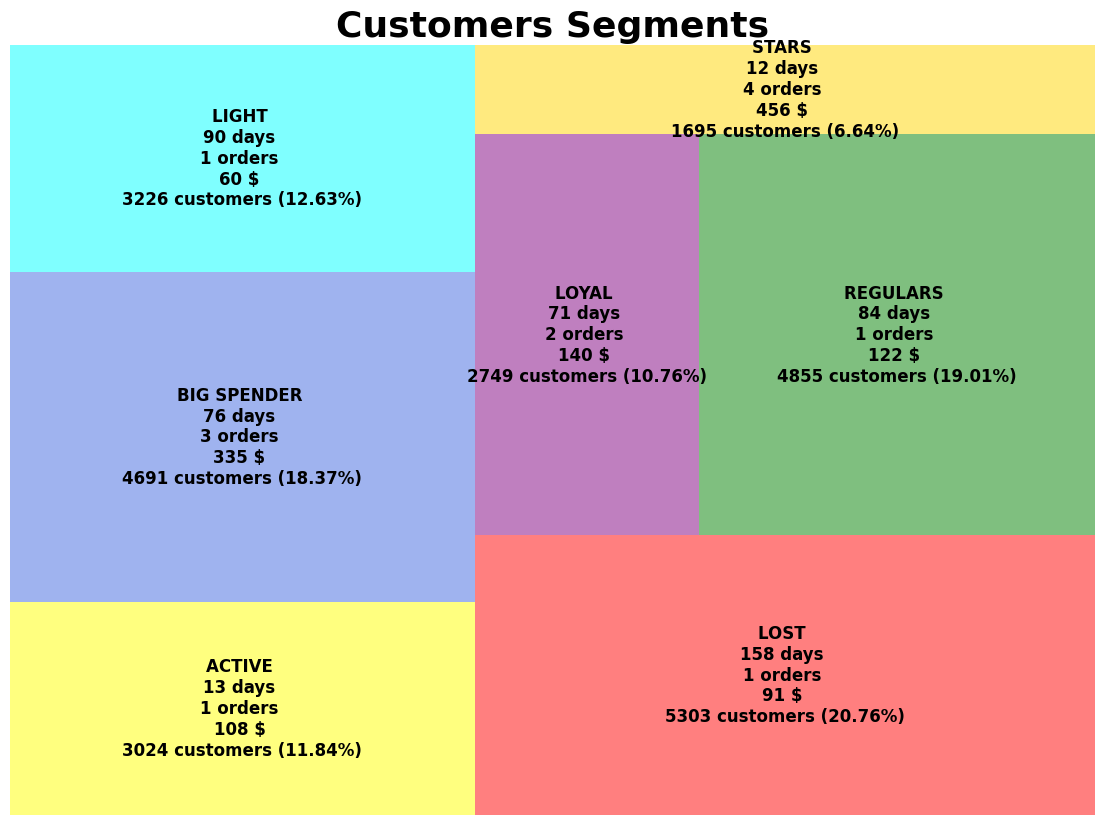

In [32]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'NEW':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [33]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

### Summary:
- Hãy nhận xét chi tiết cho từng nhóm khách hàng!

## RFM + KMeans
### Kmeans clusters with the Elbow Method

In [34]:
df_now = df_RFM[['Recency','Frequency','Monetary']]

In [35]:
df_now.head()

,Recency,Frequency,Monetary
customer_id,,,
8325158,4,17,2812.58
2028611,98,17,2661.72
6578818,5,16,2486.73
7843272,0,20,2325.06
8032770,50,13,2065.88


In [36]:
df_now.tail()

,Recency,Frequency,Monetary
customer_id,,,
4745717,167,1,0.0
4766692,169,1,0.0
4767380,179,1,0.0
4772878,155,1,0.0
99774092719790,169,1,0.0


In [37]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

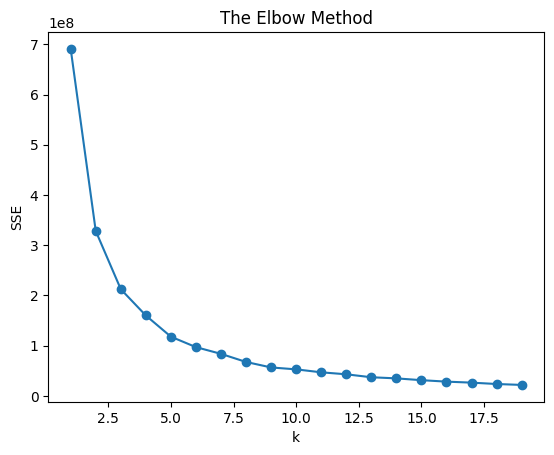

In [38]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.show()

In [39]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)
model.labels_.shape

(25543,)

In [40]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

C:\Users\khoah\AppData\Local\Temp\ipykernel_1444\1766179631.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         65.91      2.42   272.79   5364
1         44.35      4.18   535.70   1503
2         29.53      7.69  1125.21    189
3        136.81      1.14    90.29  10202
4         39.00      1.32   111.69   8285

In [41]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,66.0,2.0,273.0,5364,21.00
1,Cluster 1,44.0,4.0,536.0,1503,5.88
2,Cluster 2,30.0,8.0,1125.0,189,0.74
3,Cluster 3,137.0,1.0,90.0,10202,39.94
4,Cluster 4,39.0,1.0,112.0,8285,32.44


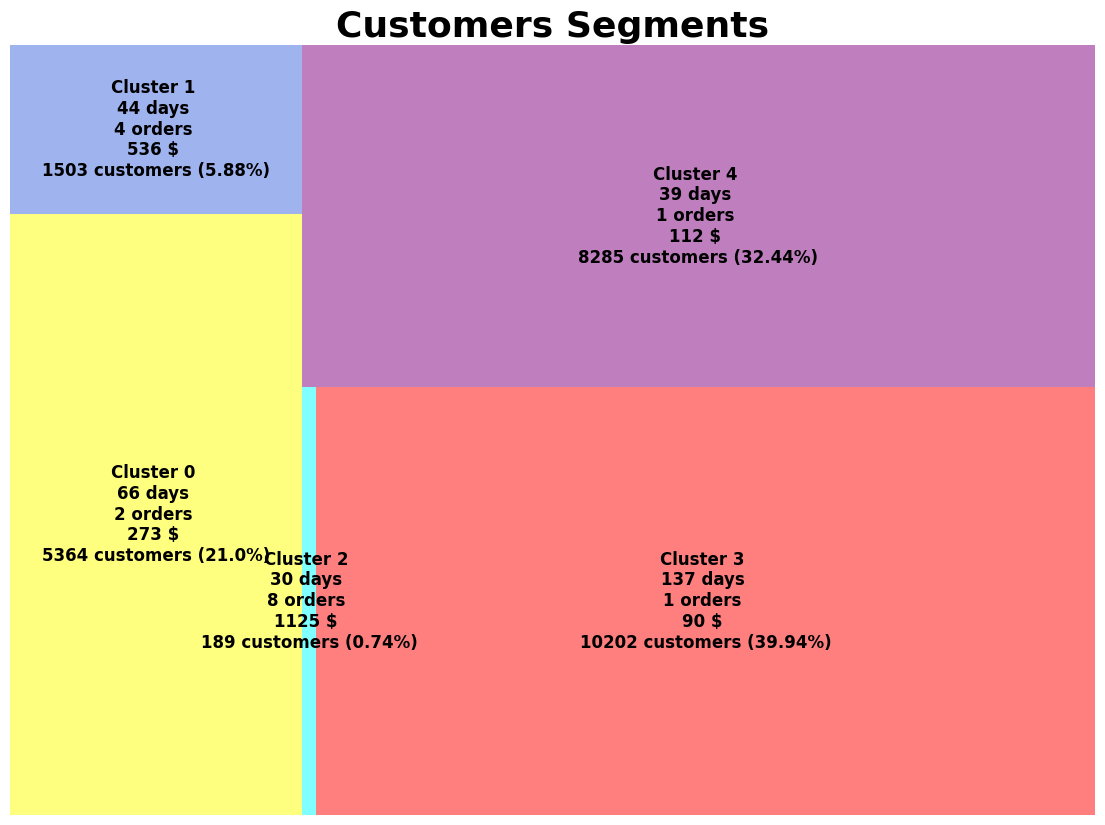

In [42]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [43]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

In [44]:
# Note: Có thể thử nghiệm thêm các cách phân cụm khác và đánh giá kết quả

#### Summary
- Hãy nhận xét chi tiết cho từng nhóm khách hàng!